<a href="https://colab.research.google.com/github/sjain600/Machine-Learning-with-PySpark/blob/main/Practice_task_Data_Exploration_and_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome the practice notebook
---
The objective of this practice is to provide a hands-on experience in data exploration and cleaning. Please follow the instructions provided in the  notebook to complete the practice.

Installing pyspark

In [ ]:
!pip install pyspark

Importing the needed modules and creating the spark session

In [ ]:
# importing spark session
from pyspark.sql import SparkSession

# data visualization modules
import matplotlib.pyplot as plt
import plotly.express as px

# pandas module
import pandas as pd

# pyspark SQL functions
from pyspark.sql.functions import col, when, count

# creating the spark session
spark = SparkSession.builder.appName("Customer_Churn_Prediction").getOrCreate()
spark

Loading the `parctice-dataset.csv` file

In [ ]:
data = spark.read.format('csv').option('header',True).option('inferSchema',True).load('Practice_dataset.csv')
data.show(5)


+----------+------------+------------+------------+------------+----------------+
|EmployeeID|        KPI1|        KPI2|        KPI3|        KPI4|Current Employee|
+----------+------------+------------+------------+------------+----------------+
|         0|-1.039682384|-0.716426478|-0.513467693| 0.414661471|               0|
|         1| 0.237093465|-0.820123996|-0.865801274| 0.438661047|               0|
|         2|-2.077948003| 0.185688029|-0.132418305| 0.711280402|               1|
|         3|-0.684711628| 1.522335039| 1.674082146|-1.234292085|               1|
|         4|-1.137117653|-0.555136531|-0.176780706|-1.776008972|               0|
+----------+------------+------------+------------+------------+----------------+
only showing top 5 rows


How many rows and columns do we have in the dataset?

In [ ]:
# write your code here
print(data.count(),"rows")

print(len(data.columns), "columns")

10000 rows
6 columns


Create a histogram matrix to analyse the distributions of the numerical columns.

- *Hint 1: List of the numerical columns = `["KPI1","KPI2","KPI3","KPI4"]`* <br>
- *Hint 2: To create the histograms, first you will need to convert the pyspark dataframe into a pandas dataframe.*

In [ ]:
# write your code here
num_cols = ["KPI1","KPI2","KPI3","KPI4"]
df = data[num_cols].toPandas()

/tmp/ipython-input-3069494429.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<Axes: title={'center': 'KPI1'}>,
        <Axes: title={'center': 'KPI2'}>],
       [<Axes: title={'center': 'KPI3'}>,
        <Axes: title={'center': 'KPI4'}>]], dtype=object)

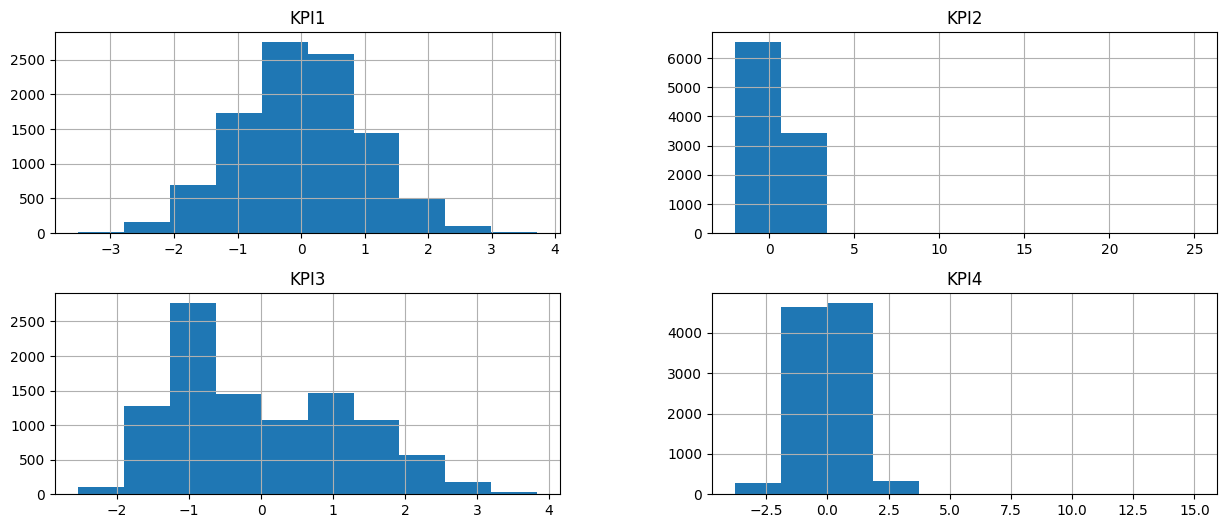

In [ ]:
fig = plt.figure(figsize=(15, 6))
ax = fig.gca()

df.hist(ax=ax)

#### As we can see from the hist chart of KPI2 and KPI4 that are so stretched. To investigate further, we can look at descriptive stats for both columns and find the difference between mean and maximum value.

Observe the distributions of the numerical columns in the histograms generated in the previous part.
- Find the columns with outilers
- Remove the outliers

In [ ]:
# write your code here
df[['KPI2', 'KPI4']].describe()

,KPI2,KPI4
count,10000.000000,9997.000000
mean,0.005517,-0.002467
std,1.150657,1.019540
min,-2.006481,-3.781217
25%,-1.005110,-0.696898
50%,-0.357864,-0.005431
75%,1.006682,0.678246
max,25.000000,15.000000


In [ ]:
# write your code here
data.select('*').where(data.KPI2 > 5).show()

+----------+------------+----+------------+----------+----------------+
|EmployeeID|        KPI1|KPI2|        KPI3|      KPI4|Current Employee|
+----------+------------+----+------------+----------+----------------+
|       271|-0.139097477|25.0|-1.039494829|0.34090306|               0|
+----------+------------+----+------------+----------+----------------+



In [ ]:
data.select('*').where(data.KPI4 > 5).show()

+----------+------------+----------+-----------+----+----------------+
|EmployeeID|        KPI1|      KPI2|       KPI3|KPI4|Current Employee|
+----------+------------+----------+-----------+----+----------------+
|       259|-1.092020773|1.14792853|1.188980132|15.0|               1|
+----------+------------+----------+-----------+----+----------------+



In [ ]:
print('Before removing outliers', data.count())
data = data.filter(data.KPI2 < 5)
data = data.filter(data.KPI4 < 5)
print('After removing outliers', data.count())

Before removing outliers 10000
After removing outliers 9998


Find the missing values in the dataset.

In [ ]:
for column in data.columns:
  data.select(count(when(col(column).isNull(), column)).alias(column)).show()

+----------+
|EmployeeID|
+----------+
|         0|
+----------+

+----+
|KPI1|
+----+
|   4|
+----+

+----+
|KPI2|
+----+
|   0|
+----+

+----+
|KPI3|
+----+
|   2|
+----+

+----+
|KPI4|
+----+
|   3|
+----+

+----------------+
|Current Employee|
+----------------+
|               0|
+----------------+



Use **Mean Imputer** to fill the missing values

In [ ]:
from pyspark.ml.feature import Imputer
# write your code here

cols_with_null = ['KPI1', 'KPI3', 'KPI4']
impute = Imputer(inputCols=cols_with_null, outputCols=cols_with_null).setStrategy('mean')

impute = impute.fit(data)
data = impute.transform(data)

Again, find the missing values in the dataset to make sure no missing value exists.

In [ ]:
# write your code here

for column in df.columns:
  data.select(count(when(col(column).isNull(), column)).alias(column)).show()

+----+
|KPI1|
+----+
|   0|
+----+

+----+
|KPI2|
+----+
|   0|
+----+

+----+
|KPI3|
+----+
|   0|
+----+

+----+
|KPI4|
+----+
|   0|
+----+

